In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/ashydv/housing-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashikahudda
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/ashydv/housing-dataset


100%|█████████████████████████████████████████████████████████████████████████████| 4.63k/4.63k [00:00<00:00, 4.48MB/s]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score 

In [4]:
df=pd.read_csv('housing-dataset/Housing.csv')

In [7]:
print("Rows and Columns of the dataset :- ",df.shape)


Rows and Columns of the dataset :-  (545, 13)


In [9]:
df.describe(include ='all')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [11]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [14]:
df[categorical_col]


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [15]:
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [18]:
df[categorical_col] = df[categorical_col].apply(binary_map)


df[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [19]:
dummy_col = pd.get_dummies(df['furnishingstatus'])


dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [20]:
df = pd.concat([df, dummy_col], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,True,False,False


In [21]:
df.drop(['furnishingstatus'], axis=1, inplace=True)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [23]:
np.random.seed(0)


df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [24]:
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [26]:
scaler = MinMaxScaler()

In [27]:
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [28]:
y_train = df_train.pop('price')


x_train = df_train

In [29]:
linear_regression = LinearRegression()


In [30]:
linear_regression.fit(x_train, y_train)


LinearRegression()

In [31]:
coefficients = linear_regression.coef_


print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.01002836
  0.01094888 -0.02097725]


In [32]:
score = linear_regression.score(x_train, y_train)


print(score)

0.6814893088451202


In [33]:
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']


In [34]:
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])


In [35]:
y_test = df_test.pop('price')


x_test = df_test


In [36]:
prediction = linear_regression.predict(x_test)

In [37]:
r2 = r2_score(y_test, prediction)

In [38]:
y_test.shape

y_test_matrix = y_test.values.reshape(-1, 1)

In [39]:
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

Text(0, 0.5, 'Predicted')

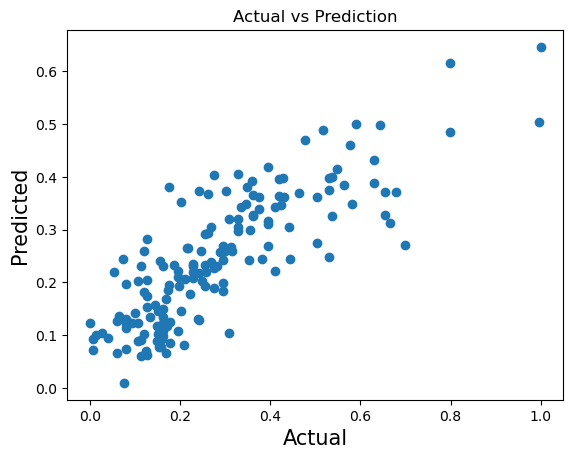

In [40]:
fig = plt.figure()

plt.scatter(y_test, prediction)

plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014451840099238337


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

In [43]:
print(" Mean Squared Error:", knn_mse)
print(" R-squared:", knn_r2)

 Mean Squared Error: 0.01761873619622445
 R-squared: 0.5118067924906263


In [44]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

In [45]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

In [46]:
print(" Mean Squared Error:", dt_mse)
print(" R-squared:", dt_r2)

 Mean Squared Error: 0.027388614548499227
 R-squared: 0.24109564745427003


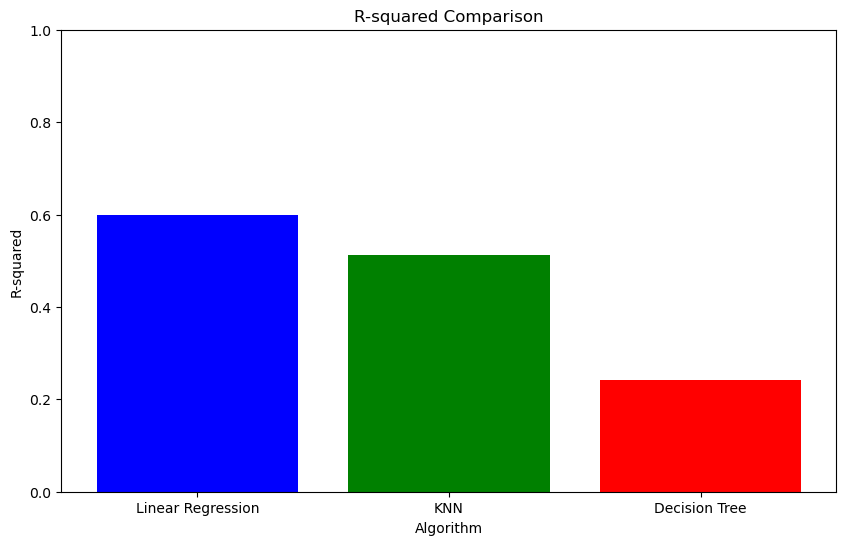

In [47]:
import matplotlib.pyplot as plt
algorithms = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2, knn_r2, dt_r2]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R-squared')
plt.ylim(0, 1)  
plt.show()

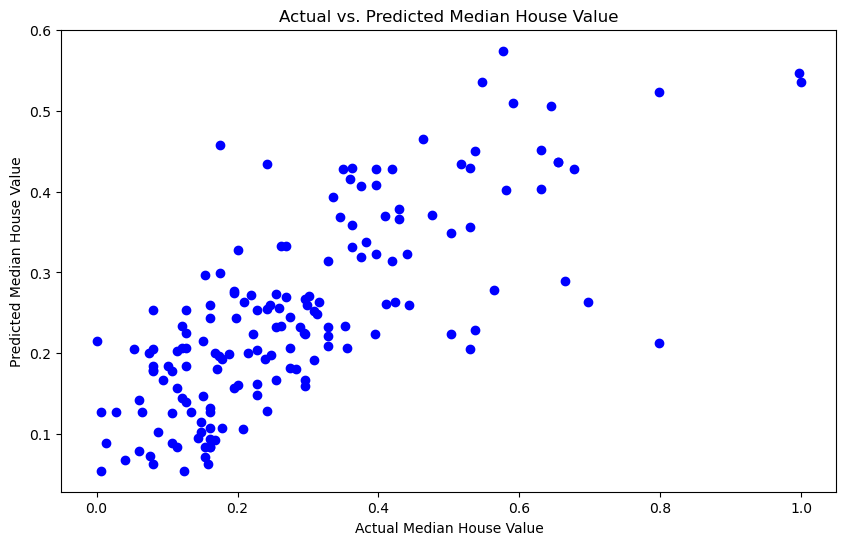

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

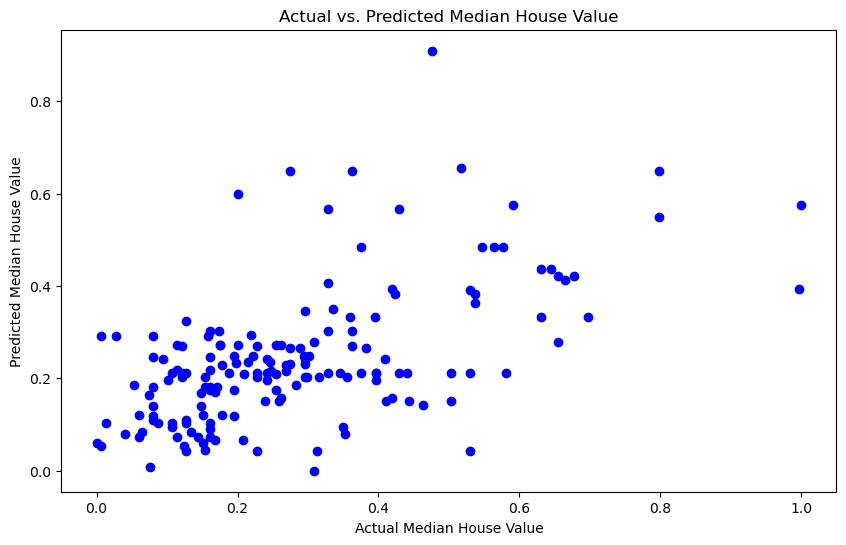

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()
